# 1. L1/L2 регуляризация 
-----
1. У нас есть данные ввиде множества пар $X$ и $y$: $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$
2. Мы хотим найти такую функцию $\hat{f}(x)$ которая бы минимизировала 
$$
MSE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 \rightarrow \text{min}_{\theta}
$$
3. Мы будем искать $\hat{f}(x)$ в предположении что это линейная функция:
$$
\hat{f}(x, \theta) = \theta_0 + x^{[1]}\theta_1 + x^{[2]}\theta_2 + \ldots + x^{[m]}\theta_m
$$

**Вопрос**:

Как запретить коэффициентам $\theta$ быть большими?

**Ответ**:

Возьмем и добавим их в оптимизируемую функцию, т.к. мы ищем минимиум этой функции то в процессе оптимизации 
они будут (по-крайней мере мы на это надеемся) уменьшаться:


$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| \rightarrow \text{min}
$$

$$
MSE_{l_2}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m \theta_j^2 \rightarrow \text{min}
$$


Обратите внимание что в сумме по тетта  индексация начинается с 1, а не с 0. Поскольку свободный коэффициент $\theta_0$ **нет смысла регуляризовывать** — если мы будем штрафовать за его величину, то получится, что мы учитываем некие априорные представления о близости целевой переменной к нулю и отсутствии необходимости в учёте её смещения. 

Коэффициент $\alpha$ называется **параметром регуляризации** и контролирует баланс
между подгонкой под обучающую выборку и штрафом за излишнюю сложность, этот параметр **подбирается на кросс-валидации**.


-----

-----

Обе модели реализованы в sklearn в модуле linear_models:

sklearn.linear_models.Lasso $\rightarrow l_1$

sklearn.linear_models.Ridge $\rightarrow l_2$

Давайте посмотрим как это выглядит на практике

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
from numpy.linalg import norm

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
params = {
    'n_samples':2000,
    'n_features':9,
    'n_informative':5,
    'bias':10,
    'noise':5,
    'coef':True, 
    'random_state': 51
}


X, y, _coef = make_regression(**params)


# Загляните внутрь функции make_regression, что означает каждый параметр?
# курсор внутрь круглых скобок и нажать shift+TAB

In [3]:
# plt.hist(y, bins=30);

In [4]:
print('Истинные коэффициенты модели:\n', np.round(_coef, 3), )

Истинные коэффициенты модели:
 [67.246  0.    16.882 98.986  0.    15.995  0.     2.751  0.   ]


## 2.1 Lasso регуляризация

1. Создайте класс Lasso с параметрами:
    - `alpha=50`
    - `fit-intercept=True`
    - `random_state=33`
2. Обучите модель Лассо регресии на данных X: `model.fit(X, y)`
3. Предскажите с помощью этой модели значения целевой переменной: `model.predict(X)`
4. Посчитайте MSE между предсказанным и истинным значением.
5. Напечатайте веса обученной линейной модели. Что вы можете о них сказать?
6. Используя параметр `alpha=15, 5, 2, 1, 0.3, 0.1, 0.03` обучите модель Lasso и посторойте зависимость **нормы** вектора весов $\theta$ от величины `alpha`.
7. Для различных значения `alpha` постройте распределение параметров `\theta`. Для этого измените параметры функции `make_regression` увеличив общее количество признаков `n_features`, количество "информативных" признаков `n_informative` и количество наблюдений `n_samples`.

Для выполнения пункта 7 и 8. напишите функцию которая принимает на вход параметр alpha, матрицу X, и вектор y, а возвразает вам вектор весов и MSE.

In [5]:
lasso = {
    'alpha' : 50,
    'fit_intercept' : True,
    'random_state' : 33
}

model = Lasso(**lasso)
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print("mse", mse)
print("coeffs", model.coef_)

mse 5717.182944100362
coeffs [17.20788804  0.          0.         45.99958806 -0.          0.
  0.          0.         -0.        ]


In [6]:
def get_theta(lass, alp, X0, y0, model_type):
    lass['alpha'] = alp
    #print(lass)
    clf = model_type(**lass)
    clf.fit(X0, y0)
    
    teta = clf.coef_
    #print(teta)
    y_pred = clf.predict(X0)
    mse = mean_squared_error(y0, y_pred)
    
    return teta, mse

[ 97.96940838 113.56181541 118.53363863 120.23010412 121.42832366
 121.7720562  121.89257256]


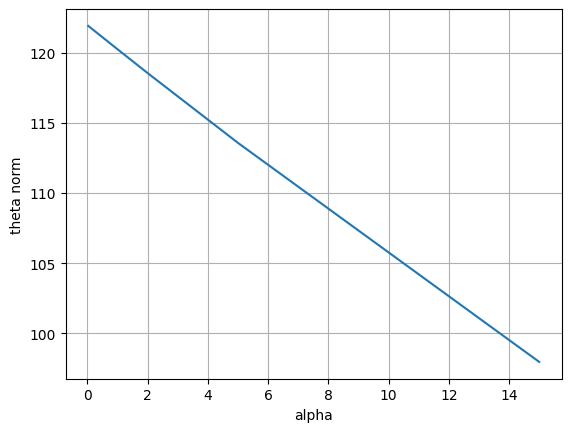

In [7]:
alpha = np.array([15, 5, 2, 1, 0.3, 0.1, 0.03])
tet_norm = np.array([])

for i in alpha:
    teta = get_theta(lasso, i, X, y, Lasso)[0]
    tet_norm = np.append(tet_norm, norm(teta))

print(tet_norm)

plt.figure(1)
plt.plot(alpha, tet_norm)
plt.ylabel("theta norm")
plt.xlabel("alpha")
plt.grid()

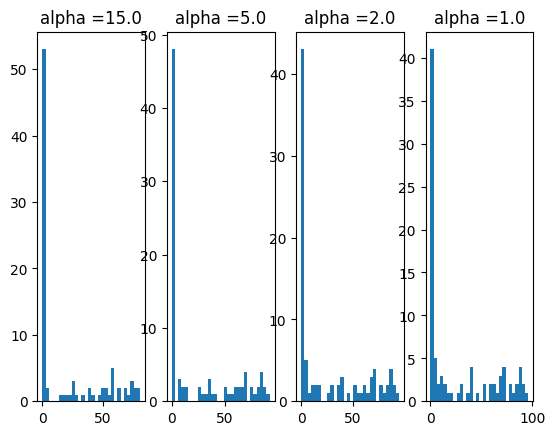

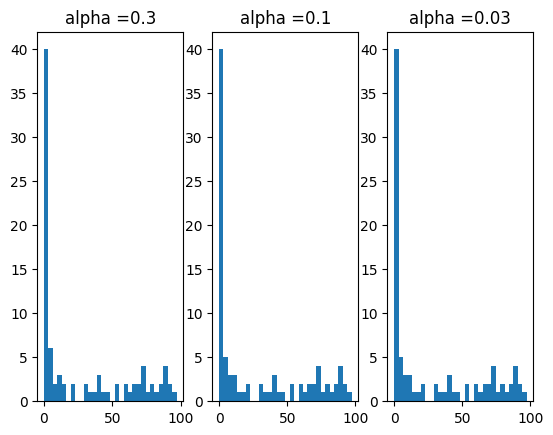

In [8]:
params_new = {
    'n_samples':20000,
    'n_features':90,
    'n_informative':50,
    'bias':10,
    'noise':5,
    'coef':True, 
    'random_state': 51
}

X_new, y_new, _coef = make_regression(**params_new)

theta_0 = get_theta(lasso, alpha[0], X_new, y_new, Lasso)[0]
theta_1 = get_theta(lasso, alpha[1], X_new, y_new, Lasso)[0]
theta_2 = get_theta(lasso, alpha[2], X_new, y_new, Lasso)[0]
theta_3 = get_theta(lasso, alpha[3], X_new, y_new, Lasso)[0]
theta_4 = get_theta(lasso, alpha[4], X_new, y_new, Lasso)[0]
theta_5 = get_theta(lasso, alpha[5], X_new, y_new, Lasso)[0]
theta_6 = get_theta(lasso, alpha[6], X_new, y_new, Lasso)[0]

fig, axs = plt.subplots(1, 4)
n_bins = 30
axs[0].hist(theta_0, bins=n_bins)
axs[0].set_title('alpha =' + str(alpha[0]))
axs[1].hist(theta_1, bins=n_bins)
axs[1].set_title('alpha =' + str(alpha[1]))
axs[2].hist(theta_2, bins=n_bins)
axs[2].set_title('alpha =' + str(alpha[2]))
axs[3].hist(theta_3, bins=n_bins)
axs[3].set_title('alpha =' + str(alpha[3]))
fig, axis = plt.subplots(1, 3)
axis[0].hist(theta_4, bins=n_bins)
axis[0].set_title('alpha =' + str(alpha[4]))
axis[1].hist(theta_5, bins=n_bins)
axis[1].set_title('alpha =' + str(alpha[5]))
axis[2].hist(theta_6, bins=n_bins)
axis[2].set_title('alpha =' + str(alpha[6]))

plt.show()

## 2.2 Ridge регуляризация

1. Тоже но для Ridge регрессии
2. Что вы можете сказать об отличиях между результатами Ridge и Lasso?

In [9]:
ridge = {
    'alpha' : 50,
    'fit_intercept' : True,
    'random_state' : 33
}

model = Ridge(**ridge)
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print("mse", mse)
print("coeffs", model.coef_)

mse 33.412317356764575
coeffs [ 6.56410616e+01  3.73049473e-03  1.63373730e+01  9.64430338e+01
 -1.92573293e-01  1.55601747e+01  3.45338984e-02  2.83875351e+00
  1.51798607e-01]


[121.00151302 121.62832986 121.81764549 121.88088196 121.92518664
 121.93785105 121.94228421]


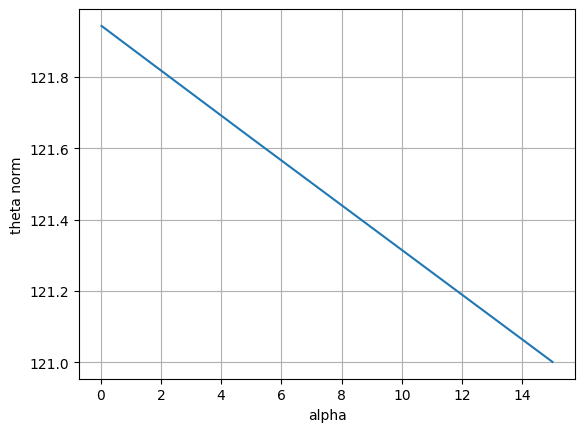

In [10]:
tet_norm_ridge = np.array([])

for i in alpha:
    teta = get_theta(lasso, i, X, y, Ridge)[0]
    tet_norm_ridge = np.append(tet_norm_ridge, norm(teta))

print(tet_norm_ridge)

plt.figure(2)
plt.plot(alpha, tet_norm_ridge)
plt.ylabel("theta norm")
plt.xlabel("alpha")
plt.grid()

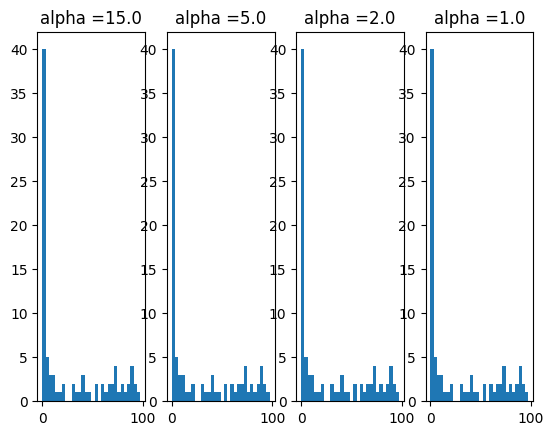

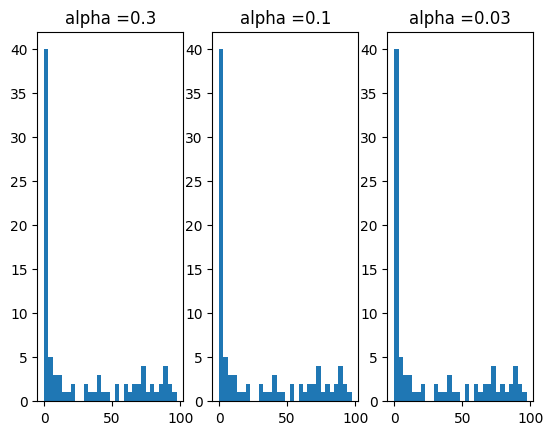

In [11]:
theta_r_0 = get_theta(lasso, alpha[0], X_new, y_new, Ridge)[0]
theta_r_1 = get_theta(lasso, alpha[1], X_new, y_new, Ridge)[0]
theta_r_2 = get_theta(lasso, alpha[2], X_new, y_new, Ridge)[0]
theta_r_3 = get_theta(lasso, alpha[3], X_new, y_new, Ridge)[0]
theta_r_4 = get_theta(lasso, alpha[4], X_new, y_new, Ridge)[0]
theta_r_5 = get_theta(lasso, alpha[5], X_new, y_new, Ridge)[0]
theta_r_6 = get_theta(lasso, alpha[6], X_new, y_new, Ridge)[0]

fig, axs = plt.subplots(1, 4)
n_bins = 30
axs[0].hist(theta_r_0, bins=n_bins)
axs[0].set_title('alpha =' + str(alpha[0]))
axs[1].hist(theta_r_1, bins=n_bins)
axs[1].set_title('alpha =' + str(alpha[1]))
axs[2].hist(theta_r_2, bins=n_bins)
axs[2].set_title('alpha =' + str(alpha[2]))
axs[3].hist(theta_r_3, bins=n_bins)
axs[3].set_title('alpha =' + str(alpha[3]))
fig, axis = plt.subplots(1, 3)
axis[0].hist(theta_r_4, bins=n_bins)
axis[0].set_title('alpha =' + str(alpha[4]))
axis[1].hist(theta_r_5, bins=n_bins)
axis[1].set_title('alpha =' + str(alpha[5]))
axis[2].hist(theta_r_6, bins=n_bins)
axis[2].set_title('alpha =' + str(alpha[6]))

plt.show()

## 2.3 Давайте посмотрим что происходит с весами модели, в процессе обучения градиентным спуском Лассо регрессии

Что происходит со значениями $\theta$ в процессе обучения

In [12]:
sgd_params = {
    'loss':'squared_loss',
    'penalty':'l1',
    'alpha':.1,
    'l1_ratio':1,
    'fit_intercept':True,
    'max_iter':None, 
    'shuffle':True,
    'random_state':76,
    'eta0' : 0.05,
    'learning_rate':'constant',
}

In [13]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)

[66.41639425  0.         15.41232901 98.47611706  0.         15.94692213
  0.          2.63564488  0.        ] [11.19759851]


/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

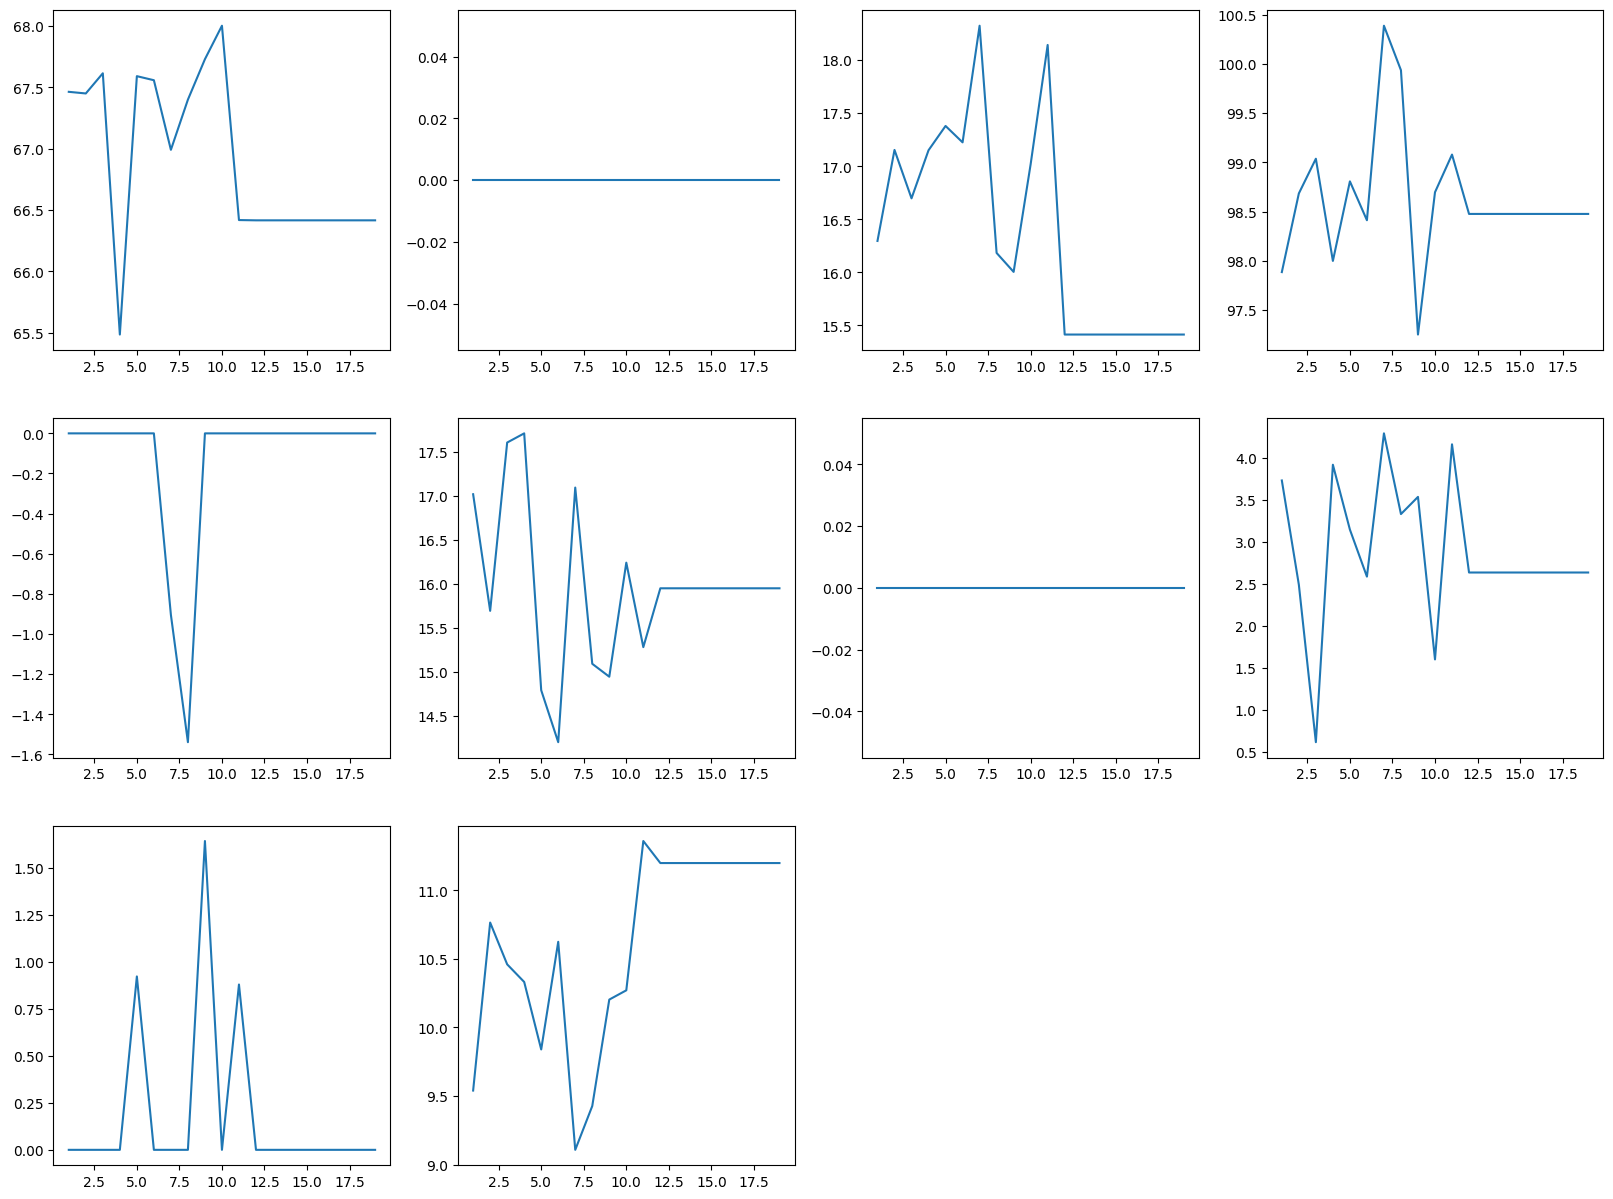

In [14]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

## 2.4 Сравните с поведением весов модели в случае Гребневой регрессии

In [15]:
sgd_params['penalty'] = 'l2'
sgd_params['l1_ratio'] = 0

In [16]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)

[61.67542138  0.24503548 15.4620448  88.66348563  0.70621003 14.24509465
 -1.99278073  1.68919835  2.56662455] [12.16015707]


/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

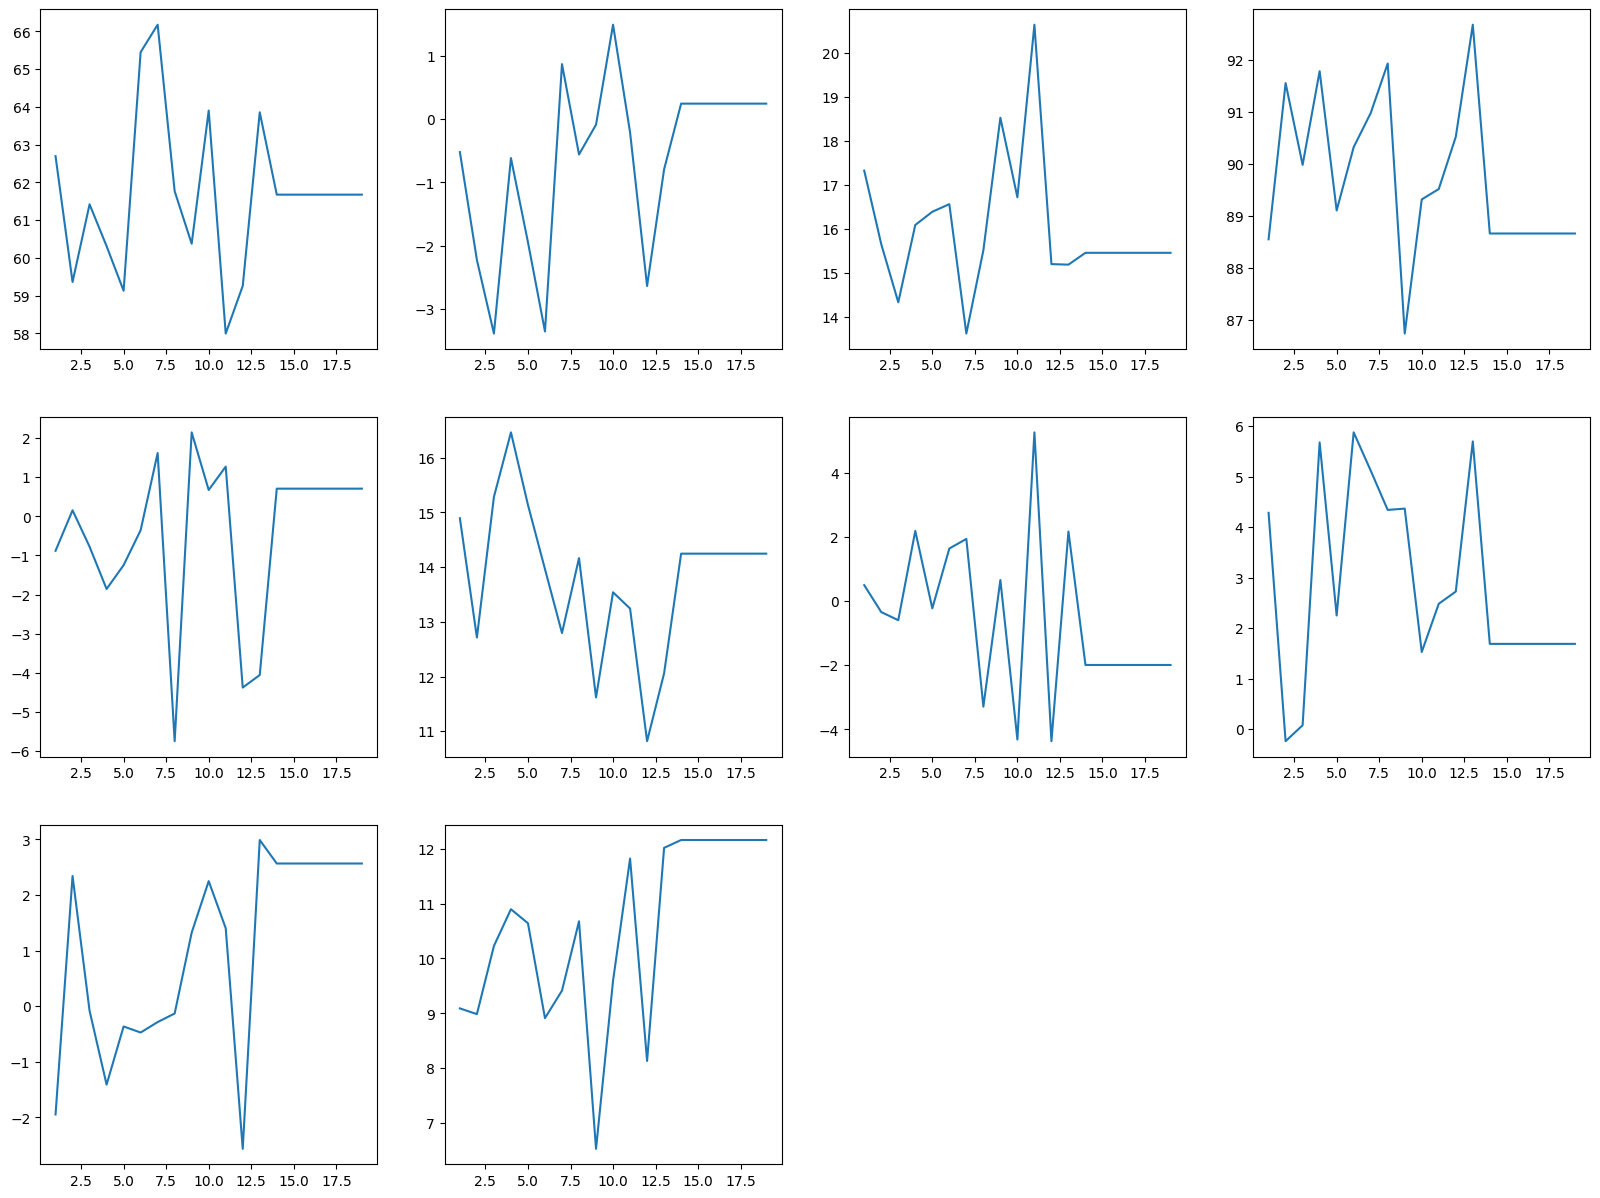

In [17]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

## 2.5 Elastic Net регуляризация

$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| +  \beta \sum_{j=1}^m \theta_j^2  \rightarrow \text{min}
$$

см. sklearn.linear_model.ElasticNet

сравните с поведением весов в случае Elastic Net

In [18]:
elnt_params = {
    'alpha':.1,
    'l1_ratio':1,
    'fit_intercept':True,
    'max_iter':None, 
    'random_state':76,
}

In [19]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    elnt_params['max_iter'] = m_iter
    model = ElasticNet(**elnt_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)



[ 6.71967055e+01  0.00000000e+00  1.67192068e+01  9.88698986e+01
 -7.39692790e-02  1.58171201e+01  0.00000000e+00  2.83843503e+00
  6.51807134e-02] 10.030532684318871


/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.616e+04, tolerance: 2.872e+03
  model = cd_fast.enet_coordinate_descent(
/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.587e+03, tolerance: 2.872e+03
  model = cd_fast.enet_coordinate_descent(


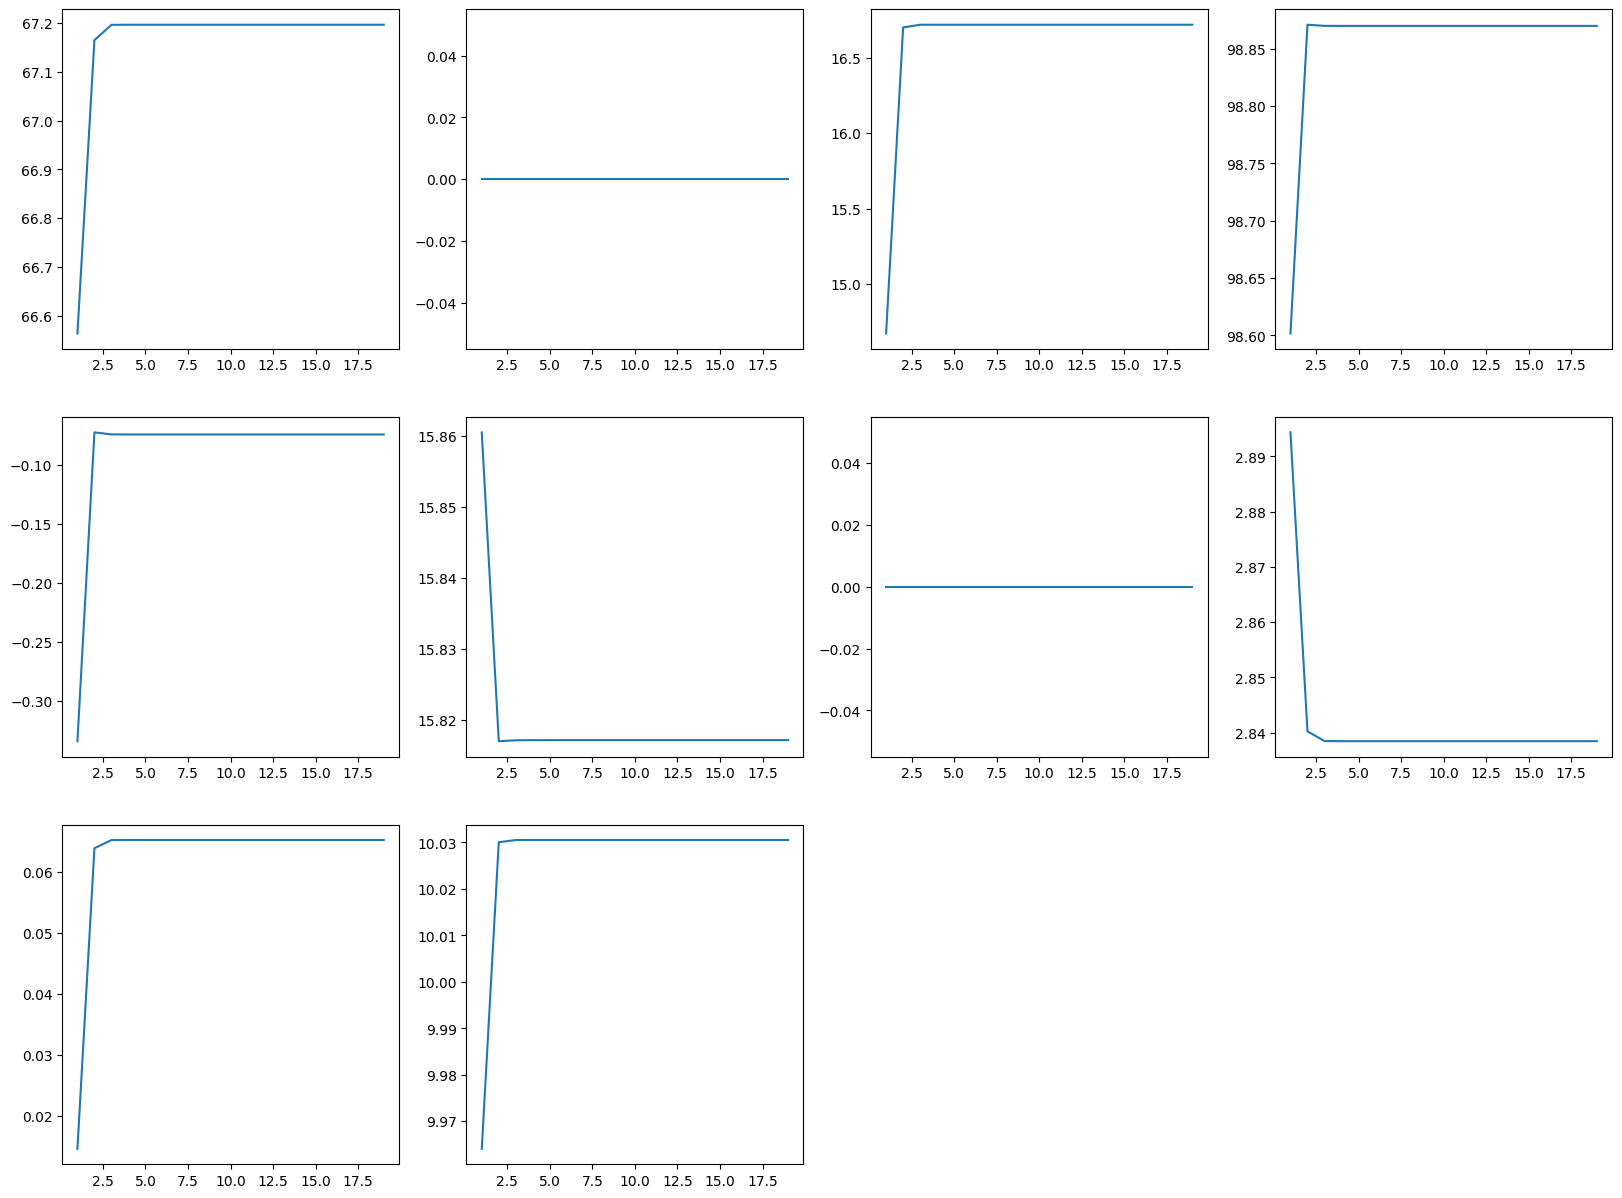

In [20]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

# 3. "Предсказание" числа в другой системе исчисления

Построим линейную модель которая переводит числа из *двоичной* системы исчисления в *десятичную*. Для этого сгенерируйте тренировочную выборку размера 10000 наблюдений, в которой в качестве признаков выступают бинарные векторы длины 32, а в качестве `y` значение в десятичной системе исчисления. Например:

- $x_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$, $y_1 = 0$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]$, $y_2 = 525856$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]$, $y_3 = 3$


1. Обучите 3 линейные модели на **всех наблюдениях**: Линейная регрессия, Лассо регрессия, Гребневая регрессия (для всех моделей устновите параметр `fit_intercept=False`, что контролирует этот параметр?).
2. Сравните ошибку, например MSE для всех трех моделей.
3. Сравните коэффиценты обученных моделей, что вы можете о них сказать?
4. Разделите ваши данные на тренировочную и тестовую выборки, обучите модели на тренировочной части данных, сделайте предсказание на тестовой. Сравните коэффициенты обученных моделей, сравните качество (в терминах MSE) на тестовой и тренировочной выборках.
5. Объясните поведение Лассо и Гребневой регрессии.


In [22]:
X_bin = np.random.randint(2, size=(10000, 32))
y_bin = np.sum(X_bin * 2 ** np.arange(X_bin.shape[1] - 1, -1, -1), axis=1)

In [30]:
ridge['fit_intercept'] = False
model_R = Ridge(**ridge)
model_R.fit(X_bin, y_bin)
y_R = model_R.predict(X_bin)
mse_R = mean_squared_error(y_bin, y_R)
print("mse Ridge =", mse_R)
print("Ridge coef", model_R.coef_)

lasso['fit_intercept'] = False
model_L = Lasso(**lasso)
model_L.fit(X_bin, y_bin)
y_L = model_L.predict(X_bin)
mse_L = mean_squared_error(y_bin, y_L)
print("mse Lasso =", mse_L)
print("Lasso coef", model_L.coef_)

model_LR = LinearRegression(fit_intercept=False)
model_LR.fit(X_bin, y_bin)
y_LR = model_LR.predict(X_bin)
mse_LR = mean_squared_error(y_bin, y_LR)
print("mse LinReg =", mse_LR)
print("LinReg coef", model_LR.coef_)

mse Ridge = 540237336325275.75
Ridge coef [2.10768387e+09 1.05512822e+09 5.29086229e+08 2.65491532e+08
 1.34336975e+08 6.82620727e+07 3.50395271e+07 1.82846649e+07
 1.08468019e+07 5.69125846e+06 4.55019031e+06 3.73847077e+06
 2.99859368e+06 2.58759155e+06 3.38322964e+06 3.39155340e+06
 2.75591902e+06 2.69432062e+06 2.04919889e+06 3.17824071e+06
 2.07304007e+06 2.18514136e+06 2.33588859e+06 3.06800039e+06
 2.98775510e+06 2.16412406e+06 2.05862943e+06 3.14076366e+06
 3.23081915e+06 2.99173730e+06 2.13091792e+06 2.63775449e+06]
mse Lasso = 4484999401317.283
Lasso coef [ 2.14848176e+09  1.07479980e+09  5.37902028e+08  2.69485219e+08
  1.35144200e+08  6.80154395e+07  3.43127235e+07  1.74077901e+07
  8.78476534e+06  4.54018915e+06  2.13819644e+06  8.54347480e+05
  2.15996441e+05 -2.22059770e+05 -6.42797694e+05 -7.68683366e+05
 -9.02984821e+05 -9.88594337e+05 -1.10766803e+06 -1.09928041e+06
 -9.29462079e+05 -8.26084657e+05 -7.45329365e+05 -7.54341243e+05
 -5.46765281e+05 -3.50307990e+05 -1.60

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, train_size=0.7, random_state=5)

model_R.fit(X_train, y_train)
y_test_R = model_R.predict(X_test)
mse_test_R = mean_squared_error(y_test, y_test_R)
print("mse Ridge =", mse_test_R)
print("Ridge coef", model_R.coef_)

model_L.fit(X_train, y_train)
y_test_L = model_L.predict(X_test)
mse_test_L = mean_squared_error(y_test, y_test_L)
print("mse Lasso =", mse_test_L)
print("Lasso coef", model_L.coef_)

model_LR.fit(X_train, y_train)
y_test_LR = model_LR.predict(X_test)
mse_test_LR = mean_squared_error(y_test, y_test_LR)
print("mse LinReg =", mse_test_LR)
print("LinReg coef", model_LR.coef_)

mse Ridge = 1079524744517214.2
Ridge coef [2.09118992e+09 1.04747929e+09 5.26033822e+08 2.64053033e+08
 1.34164327e+08 6.83910208e+07 3.60992422e+07 1.87230498e+07
 1.16573011e+07 6.40583903e+06 4.91256620e+06 5.09186364e+06
 4.05288338e+06 3.54383435e+06 5.53892606e+06 3.90758496e+06
 3.92600649e+06 3.67494638e+06 3.17114016e+06 4.32107090e+06
 2.05799158e+06 2.82211927e+06 4.00202075e+06 4.96412481e+06
 4.03399572e+06 3.10623681e+06 3.53260555e+06 4.71021957e+06
 4.55028027e+06 4.78121596e+06 3.10783907e+06 3.45216464e+06]
mse Lasso = 4640112139723.316
Lasso coef [ 2.14847715e+09  1.07481437e+09  5.37900598e+08  2.69483975e+08
  1.35189968e+08  6.80163441e+07  3.43006129e+07  1.73989022e+07
  8.84035602e+06  4.57229358e+06  2.20980781e+06  8.85038842e+05
  2.26544639e+05 -2.07587526e+05 -6.91280927e+05 -7.16203776e+05
 -8.65369917e+05 -9.25302316e+05 -1.12216514e+06 -1.12228309e+06
 -9.14340927e+05 -8.24910049e+05 -7.82371665e+05 -8.18232587e+05
 -5.69267229e+05 -4.54756978e+05 -2.10

# 4. Стоимость дома

Для набора данных из ДЗ2 сравните отобранные с помощью RFE (топ-5, топ-10) признаки, с признаками отобранными с помощью
1. L1 регуляризации
2. L2 регуляризации

In [38]:
fd = pd.read_csv('kc_house_data_train.csv', index_col=0)
pd.read_csv('kc_house_data_train.csv', index_col=0).head(3)

X_h = pd.DataFrame()

for i in fd:
    if(i != 'price' and i != 'lat' and i != 'long' and i != 'zipcode' and i != 'date' and i != 'id'):
        X_h[i] = fd[i]
        
        
Y_h = fd['price']

x_train_h, x_valid_h, y_train_h, y_valid_h = train_test_split(X_h, Y_h, train_size=0.7, random_state=5)

In [39]:
model_R.fit(x_train_h, y_train_h)
y_test_R_h = model_R.predict(x_valid_h)
R_coeff = abs(model_R.coef_)
print(R_coeff)

model_L.fit(x_train_h, y_train_h)
y_test_L_h = model_L.predict(x_valid_h)
L_coeff = abs(model_L.coef_)
print(L_coeff)

[3.20377018e+04 1.93096790e+03 1.21052624e+02 5.65143945e-02
 4.33355050e+03 2.88372126e+05 6.67460447e+04 5.87027870e+04
 1.11207623e+05 5.04770784e+01 7.05755828e+01 4.08741296e+02
 6.48109442e+01 1.33520750e+01 5.46801156e-01]
[3.11390340e+04 2.52144889e+03 6.64628793e+02 5.42524408e-02
 4.50845167e+03 5.25992254e+05 5.72240973e+04 5.87210391e+04
 1.10785423e+05 4.95671736e+02 4.73950007e+02 4.09239351e+02
 6.15350517e+01 1.63141214e+01 5.53441110e-01]


/home/ekatrina/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.664e+14, tolerance: 4.329e+11
  model = cd_fast.enet_coordinate_descent(


## Подготовьте репорт о выполненном домашнем задании

Подготовьте текстовый репорт о выполенном домашнем задании. 

Вы можете вставлять в текст таблицы и/или графики на ваше усмотрение, текст репорта должен быть в двухколоночном формате не более 2 страниц 12 кеглем Times New Roman (крайне желательно 1 страница), см. шаблон https://docs.google.com/document/d/1YqnO0OFbTR7XgzmdWryQF22J1kl9Fg7hSlNbqa6Jbiw/edit?usp=sharing

Подготовленный репорт и jupyter notebook c вашим решением необходимо отправить на почту kurmukovai@gmail.com, с темой письма [iitp-intro-ds-2023-ha3-Surname], например [iitp-intro-ds-2023-ha3-Kurmukov] до 23:59:59 МСК 10.03.2023.